In [1]:
import numpy as np
import pandas as pd

In [2]:
dict_param = np.load('../data/dict_param_all_12.npy', allow_pickle=True).item()

In [4]:
vax_2022 = pd.read_csv('../data/vac_inferred_lvm_20229.csv')

,Unnamed: 0,census_block_group,vac_rate_inferred,vac_rate_county
0,3899,21950002001,78.281090,75.493250
1,3900,21950002002,71.468450,75.493250
2,3901,21950002003,76.032190,75.493250
3,3902,21950002004,75.772964,75.493250
4,10055,51414601001,44.498566,45.022125
...,...,...,...,...
214735,53390,130830401022,46.987610,48.552338
214736,53391,130830402001,46.747707,48.552338
214737,53392,130830402002,46.500170,48.552338
214738,53393,130830403001,53.913815,48.552338


In [6]:
unvax = np.zeros_like(dict_param['unvax'])

for i, row in vax_2022.iterrows():
    census_block_group = int(row['census_block_group'])
    vac_rate_inferred = row['vac_rate_inferred']
    if census_block_group in dict_param['cbgs_to_idxs']:
        unvax[dict_param['cbgs_to_idxs'][census_block_group]] = 1 - vac_rate_inferred / 100

In [7]:
dict_param['unvax'] = unvax

In [8]:
print(dict_param.keys())

dict_keys(['poi_cbg_proportions', 'poi_time_counts', 'poi_areas', 'poi_dwell_time_correction_factors', 'cbg_sizes', 'all_unique_cbgs', 'cbgs_to_idxs', 'all_states', 'poi_cbg_visits_list', 'all_hours', 'cbg_idx_groups_to_track', 'cbg_day_prop_out', 'intervention_cost', 'poi_subcategory_types', 'cbgs_idxs', 'unvax', 'centrality_scores'])


In [7]:
bipartite = dict_param['poi_cbg_visits_list'][0]

In [ ]:
bipartite = np.load('../code/bipartite_weight_12.npy', allow_pickle=True).item()

In [ ]:
print(bipartite.shape)

In [10]:
unvax = dict_param['unvax']

In [11]:
weights = dict_param['cbg_sizes']
weights = weights / weights.sum()

In [12]:
print(bipartite.shape)

(4310261, 214697)


In [13]:
v = np.zeros_like(unvax)
v_lr = 1e-3

# llambda = 0.0
# gamma = np.zeros_like(unvax)

# llambda_lr = 10.0
# gamma_lr = 10.0



In [14]:
cases_history = []

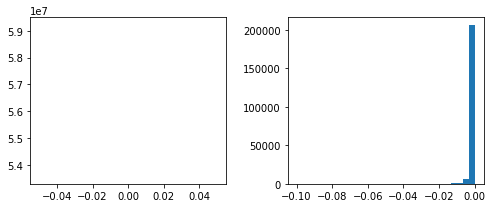

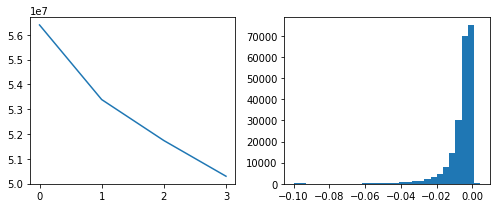

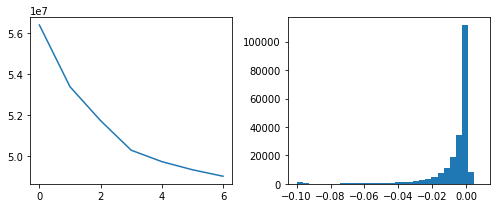

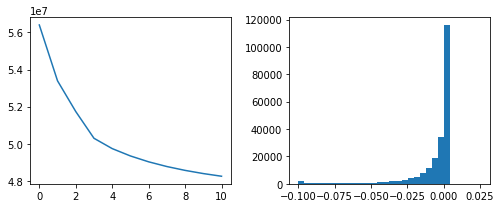

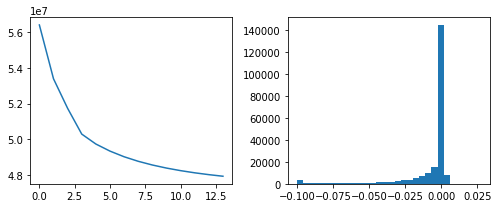

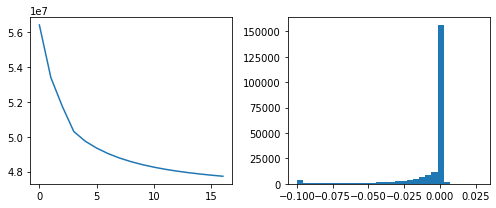

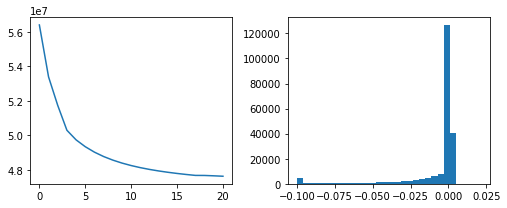

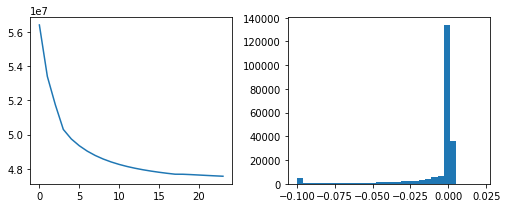

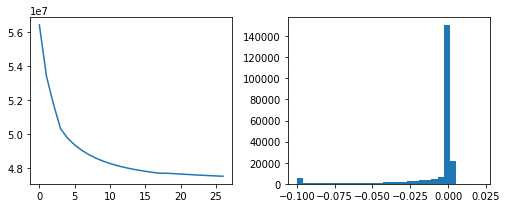

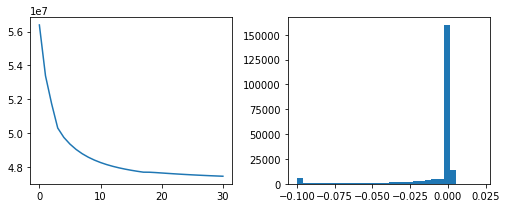

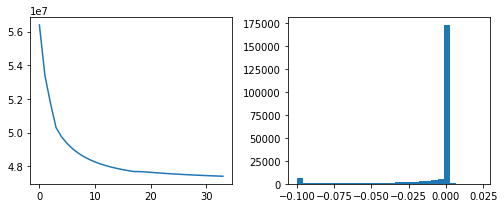

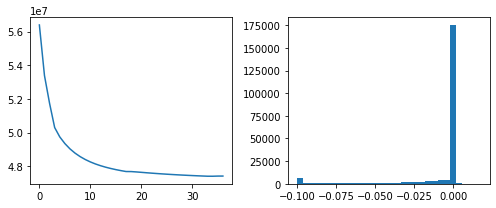

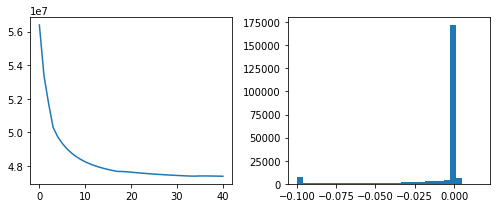

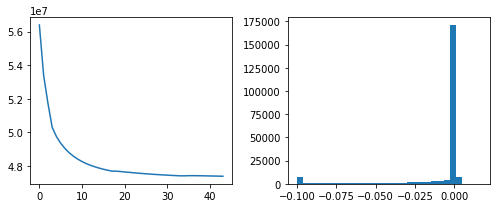

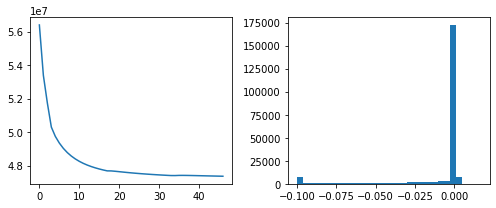

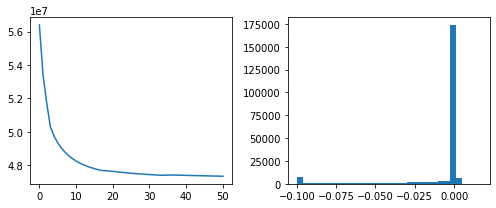

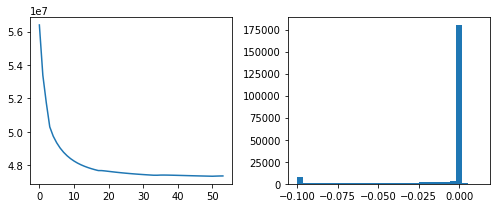

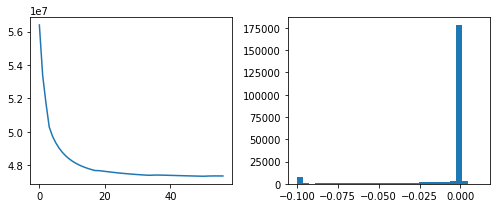

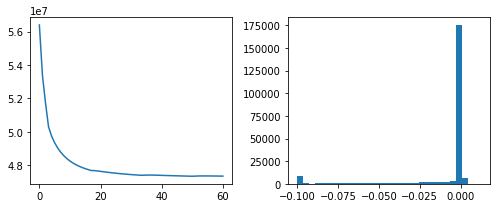

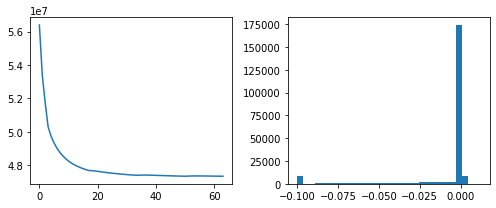

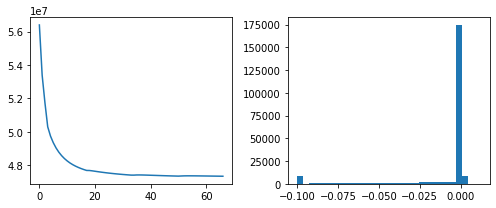

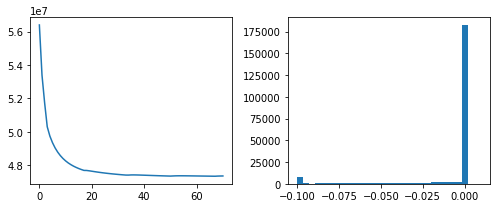

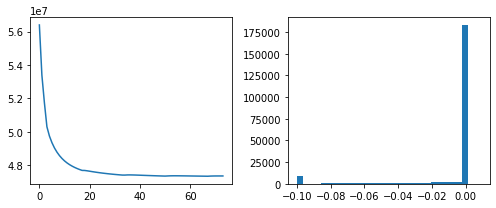

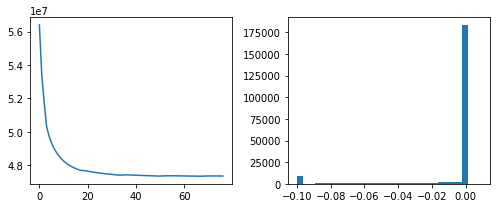

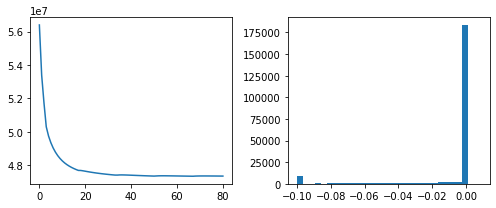

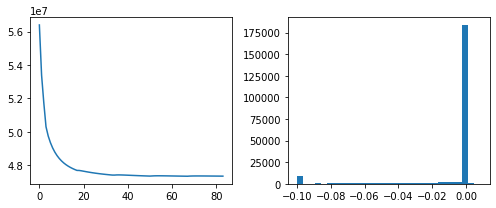

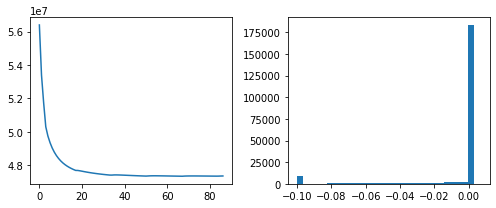

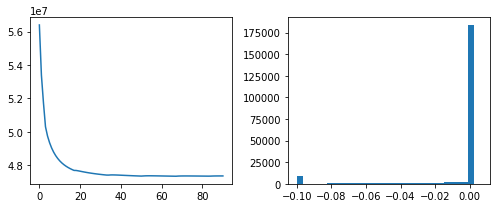

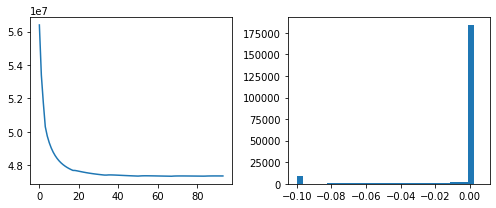

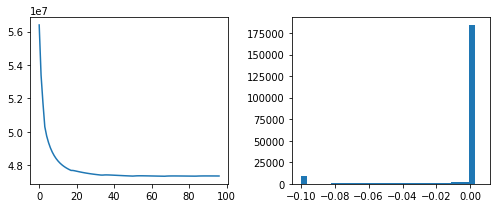

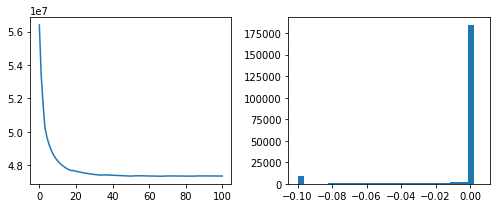

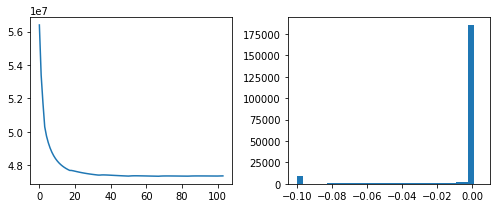

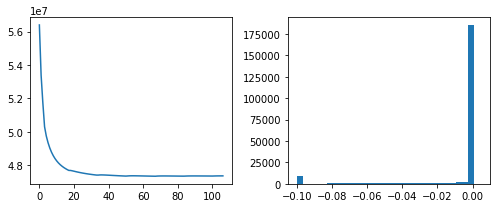

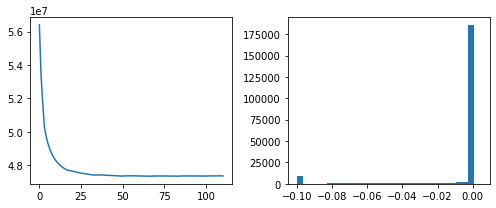

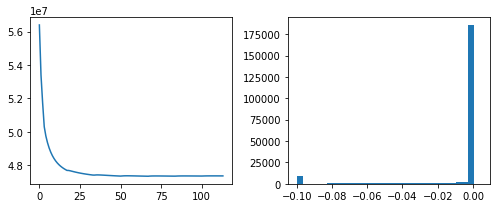

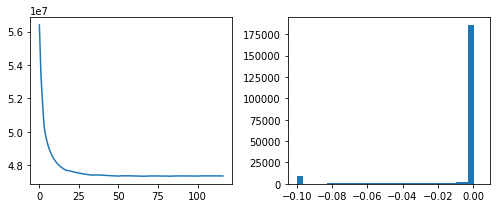

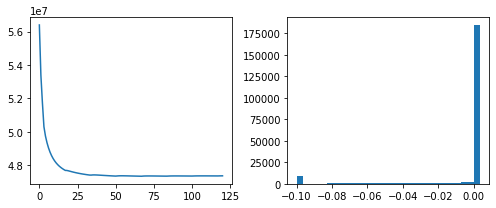

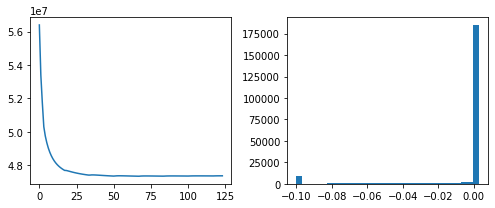

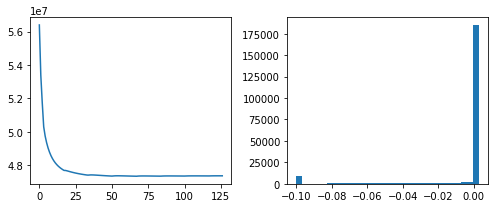

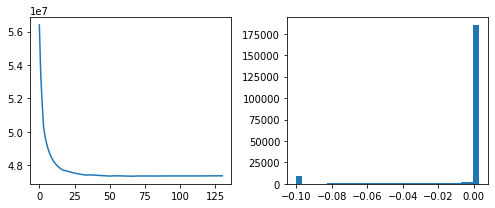

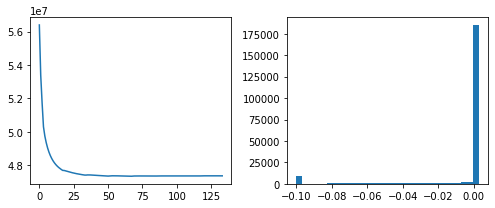

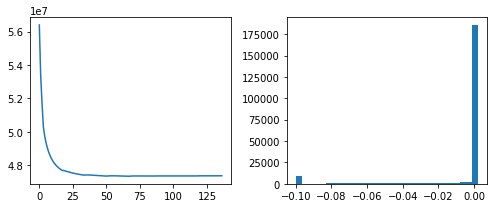

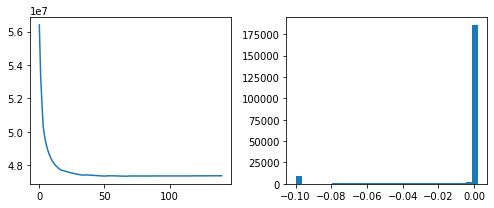

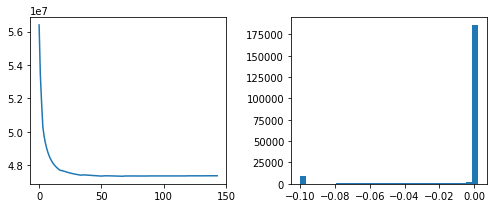

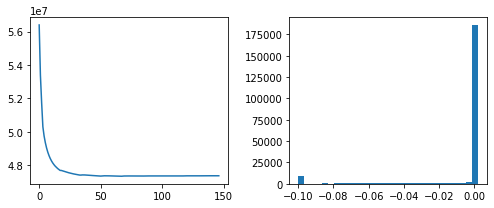

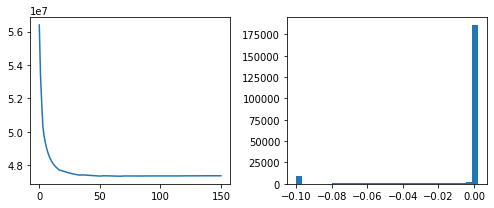

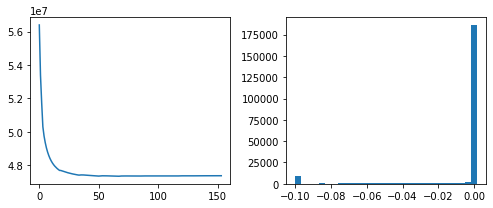

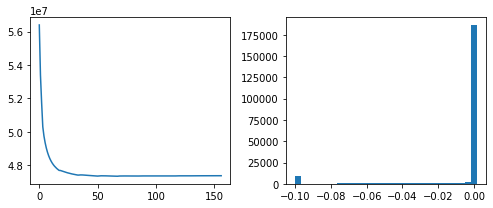

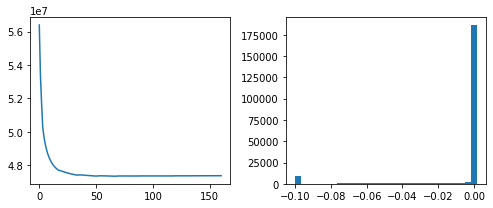

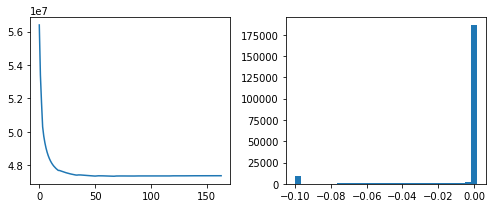

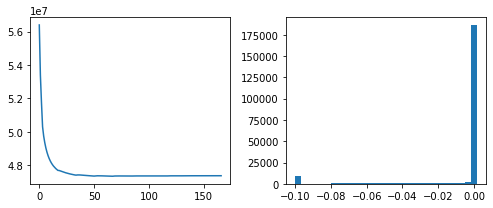

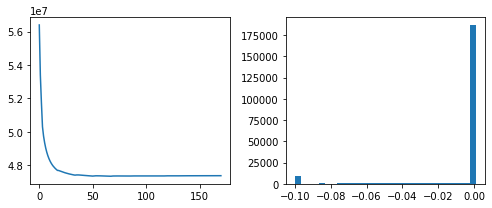

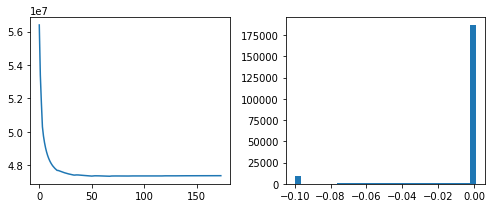

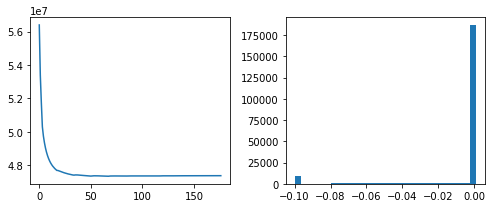

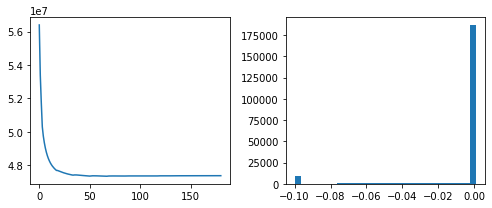

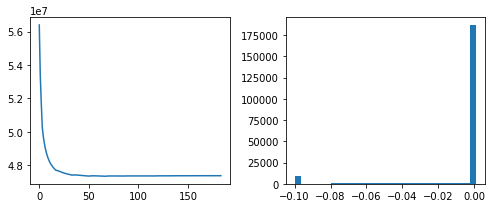

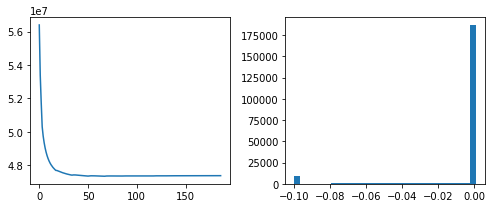

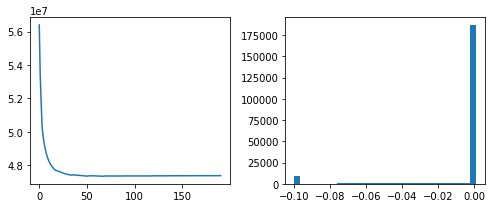

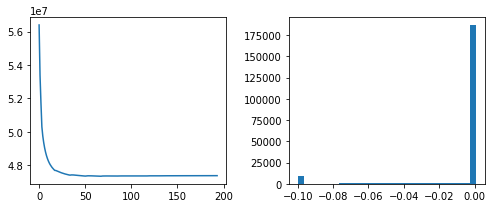

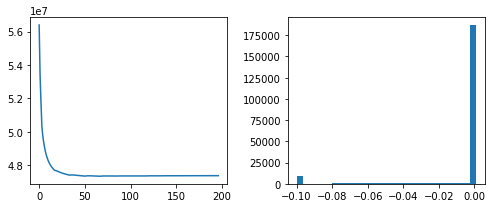

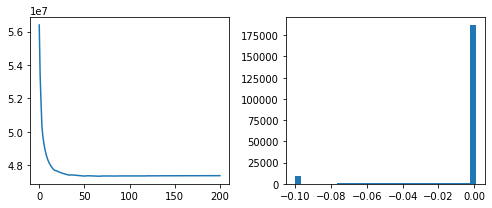

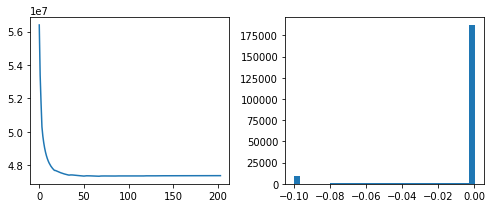

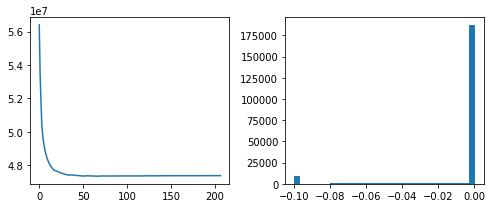

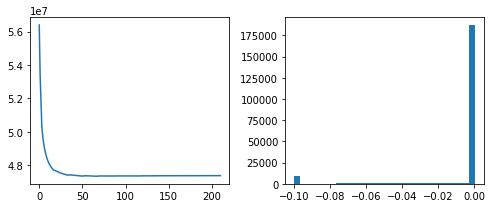

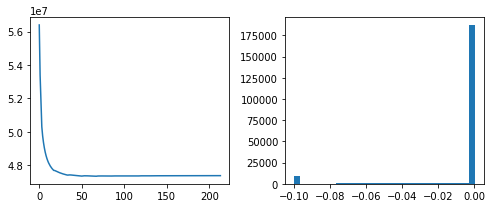

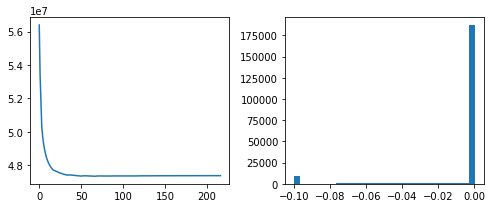

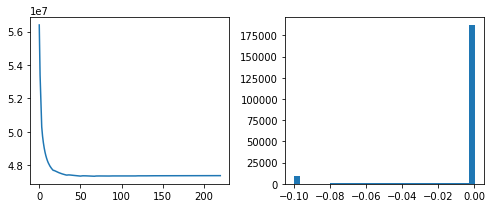

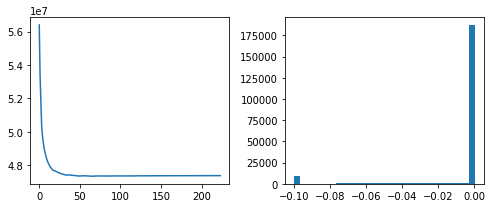

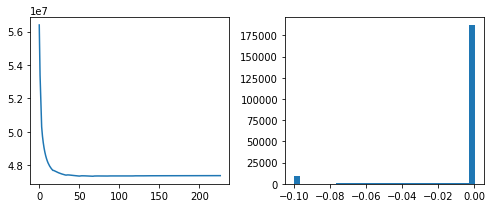

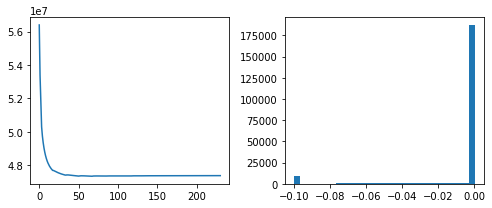

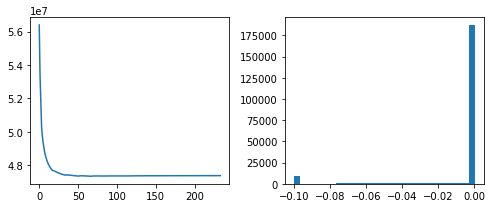

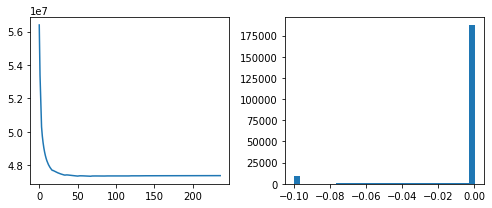

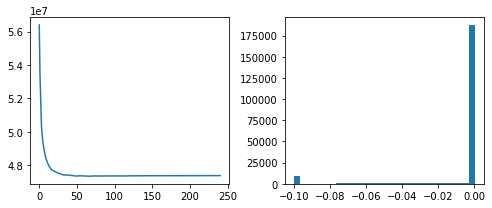

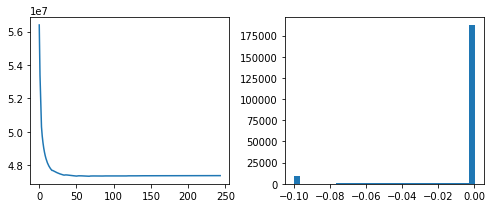

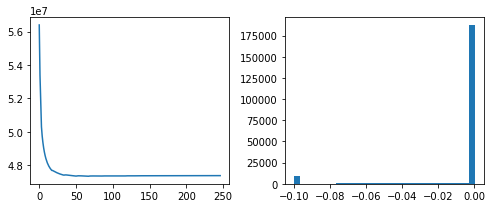

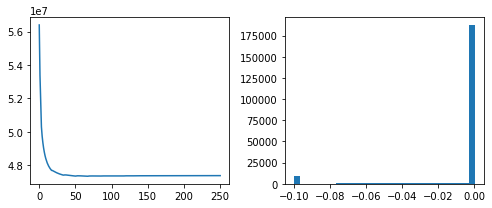

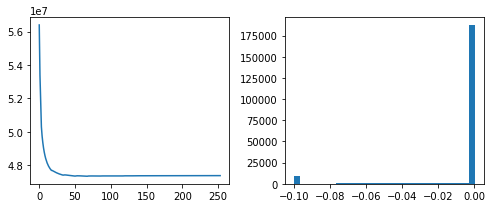

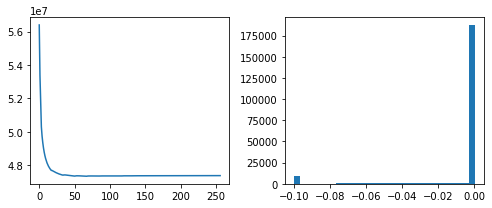

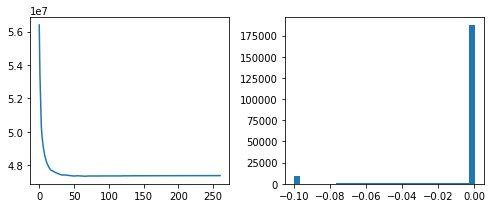

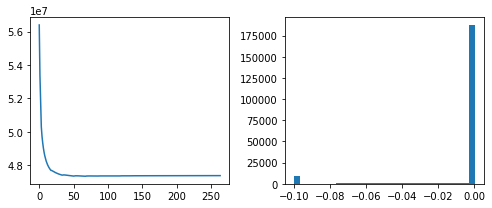

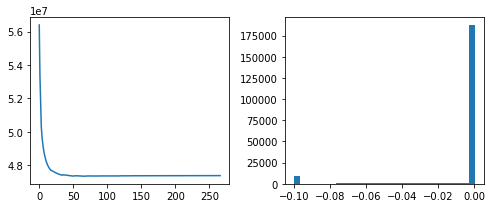

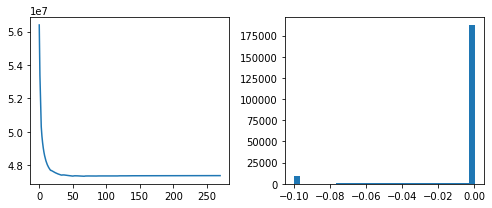

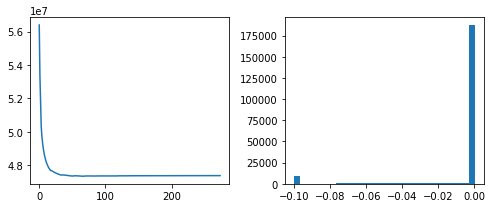

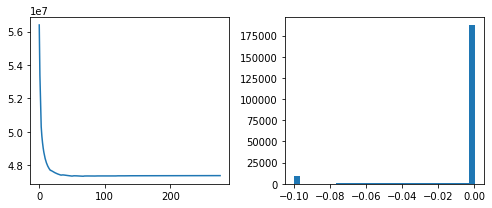

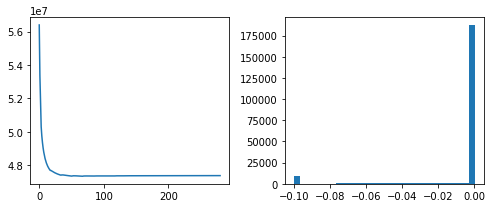

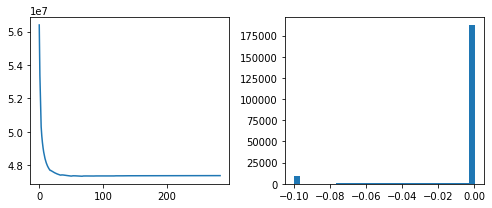

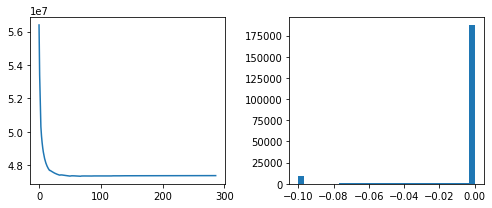

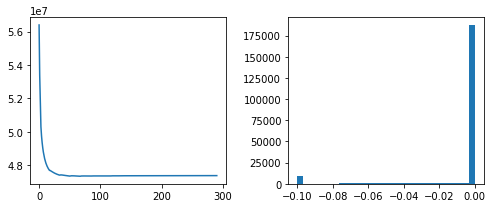

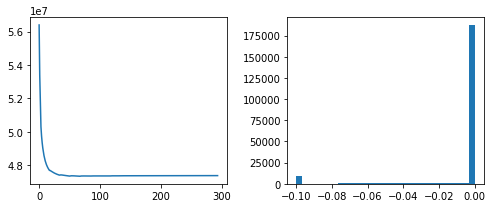

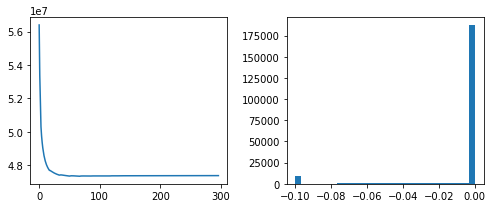

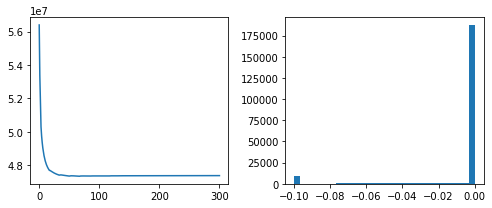

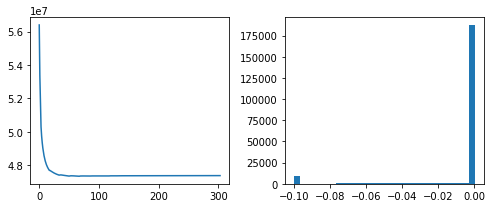

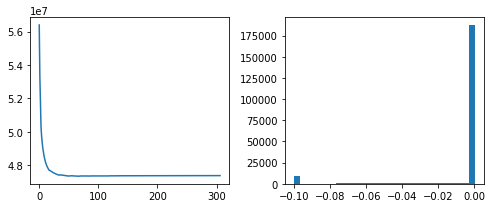

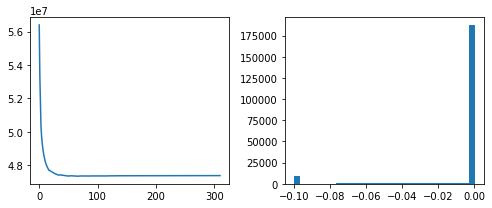

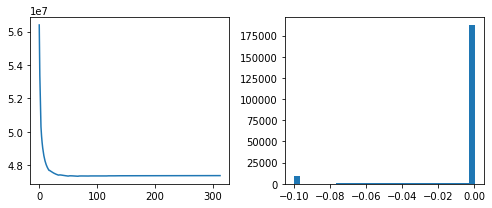

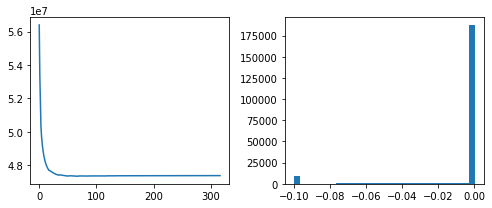

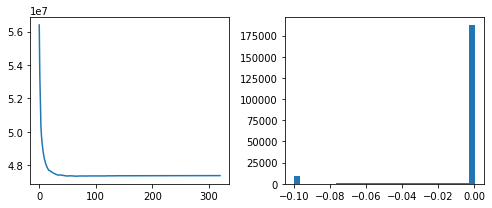

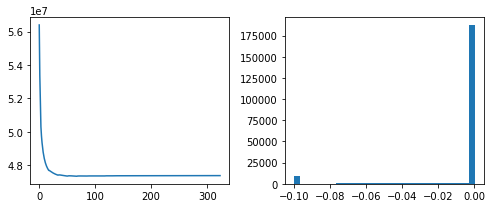

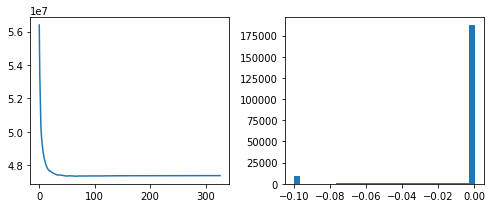

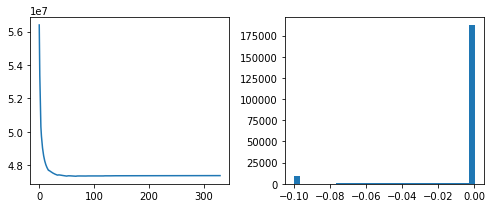

In [15]:
for t in range(1000):
    if t % 3 == 0:
        cases = np.dot(unvax + v, bipartite.T @ (bipartite @ (unvax + v)))
        cases_history.append(cases)
        
    v_grad = bipartite.T @ (bipartite @ (unvax + v)) 
    v_grad = v_grad / np.abs(v_grad).mean() # + gamma * np.sign(v) - llambda 
#     assert v_grad.shape == v.shape 
    v = v - v_lr * v_grad   
    
    # Project back to feasible set
    v = np.clip(v, a_max=0.0, a_min=np.maximum(-0.1, -unvax)) 
    if -(v * weights).sum() > 0.01:
        v = v - ((v * weights).sum() + 0.01) / np.square(weights).sum() * weights

    if t % 10 == 0:
        np.savez('../data/campaign_2022.npz', v=v, log_cases=np.array(cases_history))
        from matplotlib import pyplot as plt
        plt.figure(figsize=(7, 3))
        plt.subplot(1, 2, 1)
        plt.plot(cases_history)
        plt.subplot(1, 2, 2)
        plt.hist(v, bins=30)
        plt.tight_layout()
        plt.show()
        
    if t % 50 == 0:
        v_lr = v_lr * 0.7

NameError: name 'case_history' is not defined

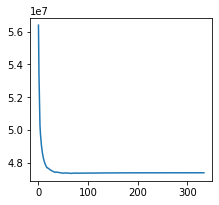

In [17]:
plt.figure(figsize=(15, 3))
plt.subplot(1, 4, 1)
plt.plot(cases_history)
plt.axhline(case_history[0])

plt.subplot(1, 4, 2)
plt.plot(llambda_history)
plt.axhline(0.0)

plt.subplot(1, 4, 3)
plt.plot(gamma_history)
plt.axhline(0.0)

plt.subplot(1, 4, 4)
plt.hist(v, bins=30)
plt.tight_layout()
plt.show()

In [18]:
cases = np.dot(unvax - init_v, bipartite.T @ (bipartite @ (unvax - init_v)))

NameError: name 'init_v' is not defined